# KPMG VIRTUAL INTERNSHIP PROJECT

Company Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation. They have dataset which is full of error means the data quality issues in the dataset and then after I analize the sales growth of the company.


## TASK: 1 - Data Quality Assessment
#### Assessment of data quality and completeness in preparation for analysis.
#### The client provided KPMG with 3 datasets:

#### 1.Customer Demographic

#### 2.Customer Addresses

#### 3.Transactions data in the past 3 months

### Imported all important Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import os
print(os.listdir("H:\KPMG"))

['CustomerAddress.xlsx', 'CustomerDemographic.xlsx', 'dataset.xlsx', 'discription.xlsx', 'NewCustomerList.xlsx', 'Transactions.xlsx']


## CustomerDemographic

In [3]:
#Read csv file
cd = pd.read_excel('H:\KPMG\CustomerDemographic.xlsx')


C:\Users\DELL\AppData\Local\Temp\ipykernel_10672\3748078777.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cd = pd.read_excel('H:\KPMG\CustomerDemographic.xlsx')


In [4]:
cd.shape

(4000, 12)

In [5]:
cd.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [6]:
cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [60]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            4000 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  4000 non-null   object 
 6   job_title                            4000 non-null   object 
 7   job_industry_category                4000 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [57]:
#Counting of data types
print(cd.dtypes.value_counts())

object     9
int64      2
float64    1
dtype: int64


In [9]:
#Null values in each column
cd.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [10]:
#Percentage of null values in columns
cd.isna().mean() * 100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [11]:
#delete duplicate values(The Values that are comes multiple times in dataset)
cd.drop(cd[cd.duplicated()].index,inplace=True)

In [12]:
#Replace all Null values to 0
cd=cd.fillna(value=0)
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,0,Male,33,1961-10-03 00:00:00,0,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,0,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,0,Assistant Manager,IT,High Net Worth,N,No,0.0
3998,3999,Patrizius,0,Male,11,1973-10-24 00:00:00,0,Manufacturing,Affluent Customer,N,Yes,10.0


In [13]:
#now total null values in l2 dataset
cd.isnull().sum().sum()

0

In [14]:
#Null values in each column
cd.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [15]:
#Checking for uniquess of each column
cd.nunique()

customer_id                            4000
first_name                             3139
last_name                              3726
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3449
job_title                               196
job_industry_category                    10
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   23
dtype: int64

In [16]:
cd['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [17]:
cd['DOB'].value_counts()

0                      87
1978-01-30 00:00:00     7
1962-12-17 00:00:00     4
1977-05-13 00:00:00     4
1976-07-16 00:00:00     4
                       ..
1989-06-16 00:00:00     1
1998-09-30 00:00:00     1
1985-03-11 00:00:00     1
1989-10-23 00:00:00     1
1991-11-05 00:00:00     1
Name: DOB, Length: 3449, dtype: int64

In [18]:
cd['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
0                     656
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [19]:
cd['job_title'].value_counts()

0                                       506
Business Systems Development Analyst     45
Tax Accountant                           44
Social Worker                            44
Internal Auditor                         42
                                       ... 
Database Administrator I                  4
Health Coach I                            3
Health Coach III                          3
Research Assistant III                    3
Developer I                               1
Name: job_title, Length: 196, dtype: int64

In [20]:
cd['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [21]:
cd['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [22]:
cd['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

In [61]:
cd['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
0                     656
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [23]:
# Checking for the missing values and its precentage
values=cd.isnull().sum()
percentage=100*cd.isnull().sum()/len(cd)
table=pd.concat([values,percentage.round(2)],axis=1)
table.columns=['No of missing values','percentage of missing values']
table[table['No of missing values']!=0].sort_values('percentage of missing values',ascending=False)

,No of missing values,percentage of missing values


Text(0, 0.5, 'Mean of Customer')

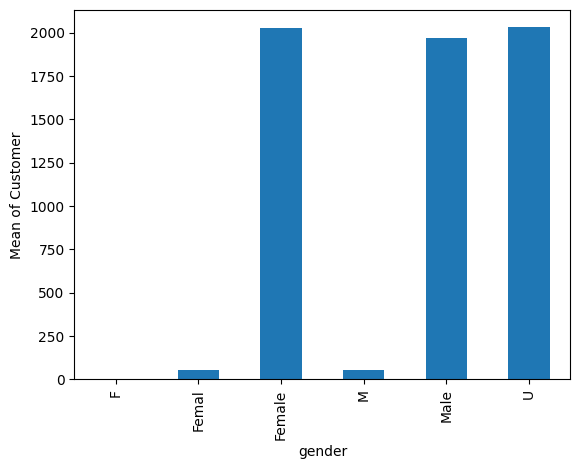

In [24]:
#Understanding to gender with respective to mean of each respective customer_id
cd.groupby("gender")["customer_id"].mean().plot.bar()
plt.ylabel("Mean of Customer")

In [25]:
cd['past_3_years_bike_related_purchases'].describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [26]:
cd['DOB'].describe(datetime_is_numeric=True)

count     4000
unique    3449
top          0
freq        87
Name: DOB, dtype: int64

In [27]:
print('DOB blanks:', pd.isna(cd['DOB']).sum())

DOB blanks: 0


wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
blanks: 0


(array([2000.,    0.,    0.,    0.,    0.,  979.,    0.,    0.,    0.,
        1021.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

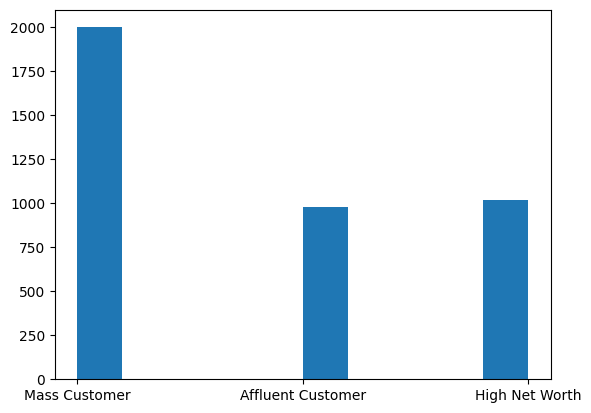

In [28]:
print('wealth_segment:', cd['wealth_segment'].unique())
print('blanks:', pd.isna(cd['wealth_segment']).sum())
plt.hist(cd['wealth_segment'][pd.notna(cd['wealth_segment'])])

deceased_indicator: ['N' 'Y']
blanks: 0


(array([3.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

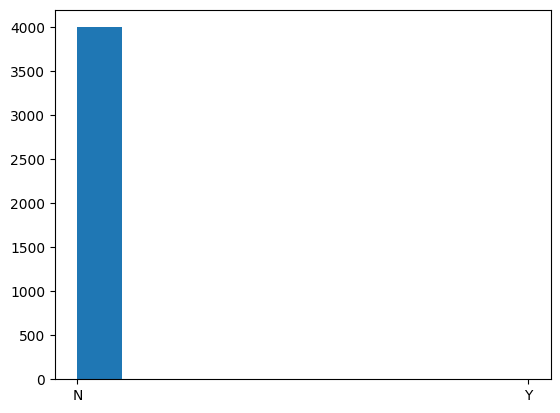

In [29]:
print('deceased_indicator:', cd['deceased_indicator'].unique())
print('blanks:', pd.isna(cd['deceased_indicator']).sum())
plt.hist(cd['deceased_indicator'][pd.notna(cd['deceased_indicator'])])

owns_car: ['Yes' 'No']
blanks: 0


(array([2024.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

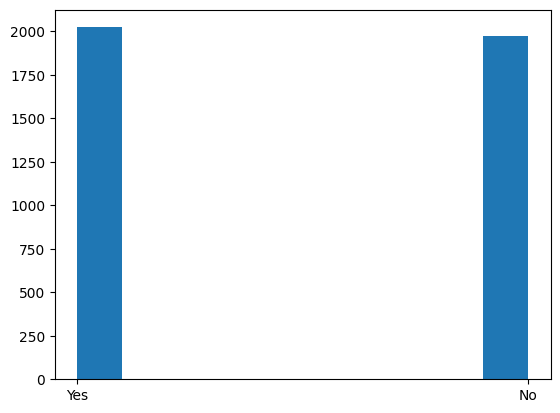

In [30]:
print('owns_car:', cd['owns_car'].unique())
print('blanks:', pd.isna(cd['owns_car']).sum())
plt.hist(cd['owns_car'][pd.notna(cd['owns_car'])])

## Customer Addresses

In [31]:
#Read csv file
ca = pd.read_excel('H:\KPMG\CustomerAddress.xlsx')

In [32]:
ca.shape

(3999, 6)

In [33]:
ca.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [34]:
ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [35]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [36]:
#Counting of data types
print(ca.dtypes.value_counts())

int64     3
object    3
dtype: int64


In [37]:
#Null values in each column
ca.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [38]:
#Checking for uniquess of each column
ca.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [39]:
#Percentage of null values in columns
ca.isna().mean() * 100

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [40]:
#delete duplicate values(The Values that are comes multiple times in dataset)
cd.drop(cd[cd.duplicated()].index,inplace=True)

In [41]:
#now total null values in ca dataset
ca.isnull().sum().sum()

0

In [42]:
ca['customer_id'].value_counts()

1       1
2676    1
2663    1
2664    1
2665    1
       ..
1343    1
1344    1
1345    1
1346    1
4003    1
Name: customer_id, Length: 3999, dtype: int64

In [43]:
 ca['address'].value_counts()

3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64

In [44]:
ca['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

In [45]:
ca['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [46]:
ca['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [47]:
ca['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

Text(0, 0.5, 'Mean of Customer')

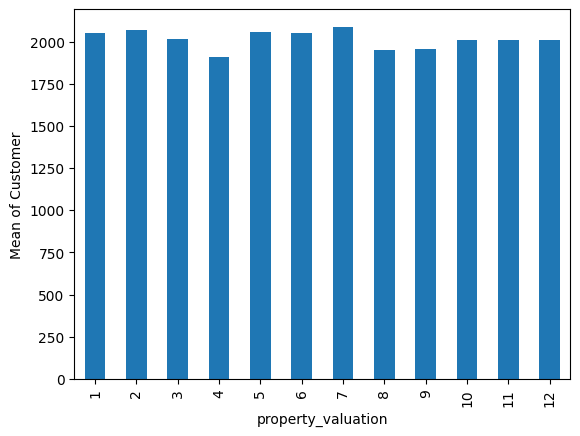

In [48]:
#Understanding to property valuation with respective to mean of each respective customer_id
ca.groupby("property_valuation")["customer_id"].mean().plot.bar()
plt.ylabel("Mean of Customer")

## Univariate Analysis
#### Categorical Variable

<Axes: xlabel='state', ylabel='count'>

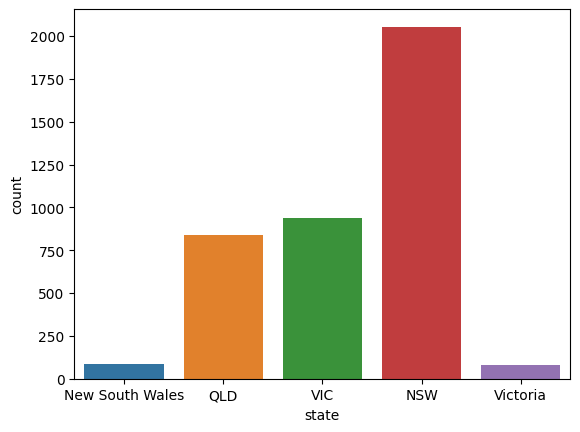

In [66]:
#univirate analysis for some categorical columns
sns.countplot(data=ca, x='state')

## Transactions data

In [86]:
#Read csv file
td = pd.read_excel('H:\KPMG\Transactions.xlsx')

In [87]:
td.shape

(20000, 13)

In [88]:
td.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [89]:
td.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [90]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [94]:
#Counting of data types
print(td.dtypes.value_counts())

object            5
float64           4
int64             3
datetime64[ns]    1
dtype: int64


In [93]:
#Null values in each column
td.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [95]:
#Percentage of null values in columns
td.isna().mean() * 100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [97]:
#delete duplicate values(The Values that are comes multiple times in dataset)
td.drop(td[td.duplicated()].index,inplace=True)

In [98]:
#Replace all Null values to 0
td=td.fillna(value=0)
td

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [99]:
#Null values in each column
td.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [100]:
#Checking for uniquess of each column
td.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          7
product_line                   5
product_class                  4
product_size                   4
list_price                   296
standard_cost                104
product_first_sold_date      101
dtype: int64

In [102]:
td['online_order'].value_counts()

0.0    10171
1.0     9829
Name: online_order, dtype: int64

In [103]:
td['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [104]:
td['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
0                  197
Name: brand, dtype: int64

In [106]:
td['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
0             197
Name: product_line, dtype: int64

In [107]:
td['product_class'].value_counts()

medium    13826
high       3013
low        2964
0           197
Name: product_class, dtype: int64

In [109]:
td['product_size'].value_counts()

medium    12990
large      3976
small      2837
0           197
Name: product_size, dtype: int64

In [110]:
# Checking for the missing values and its precentage
values=td.isnull().sum()
percentage=100*td.isnull().sum()/len(td)
table=pd.concat([values,percentage.round(2)],axis=1)
table.columns=['No of missing values','percentage of missing values']
table[table['No of missing values']!=0].sort_values('percentage of missing values',ascending=False)

,No of missing values,percentage of missing values


Text(0, 0.5, 'Mean of Customer')

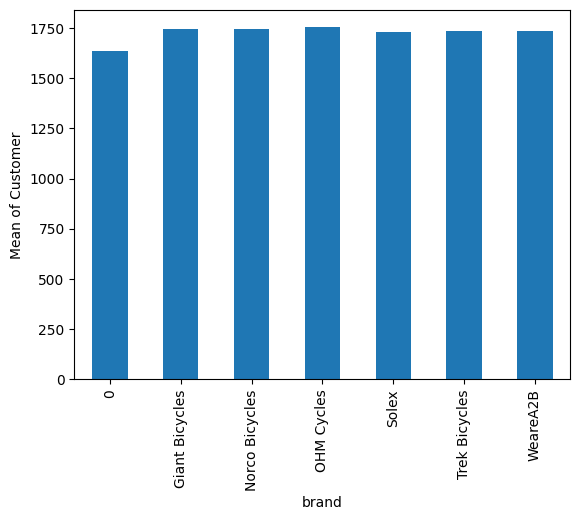

In [113]:
td.groupby("brand")["customer_id"].mean().plot.bar()
plt.ylabel("Mean of Customer")

<Axes: xlabel='order_status', ylabel='count'>

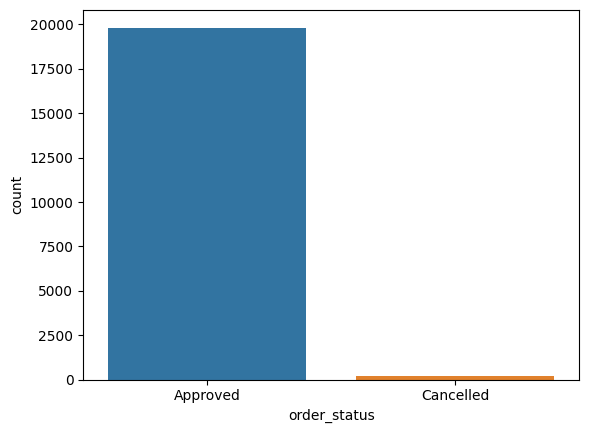

In [116]:
#univirate analysis for some categorical columns
sns.countplot(data=td, x='order_status')

<Axes: xlabel='product_class', ylabel='count'>

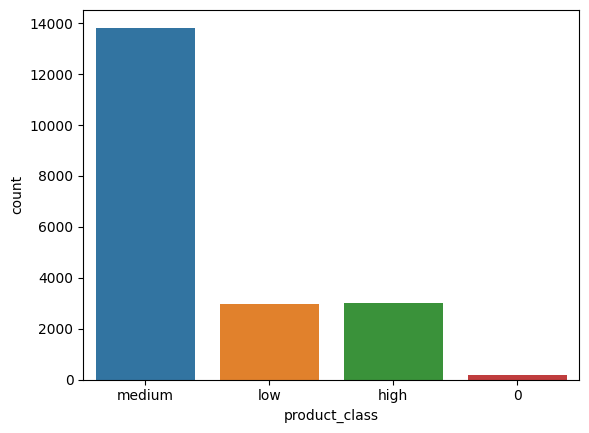

In [117]:
sns.countplot(data=td, x='product_class')

<Axes: xlabel='product_size', ylabel='count'>

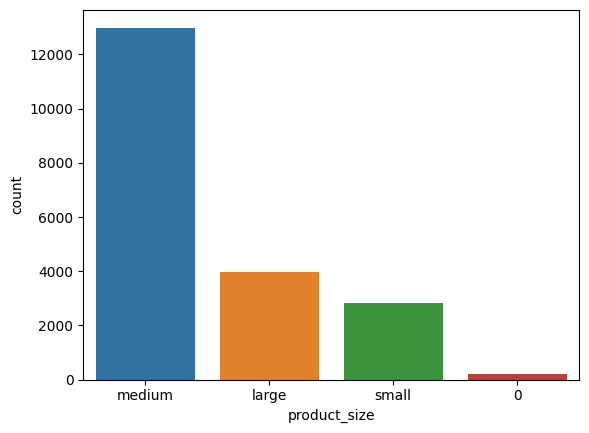

In [119]:
sns.countplot(data=td, x='product_size')

<Axes: xlabel='online_order', ylabel='count'>

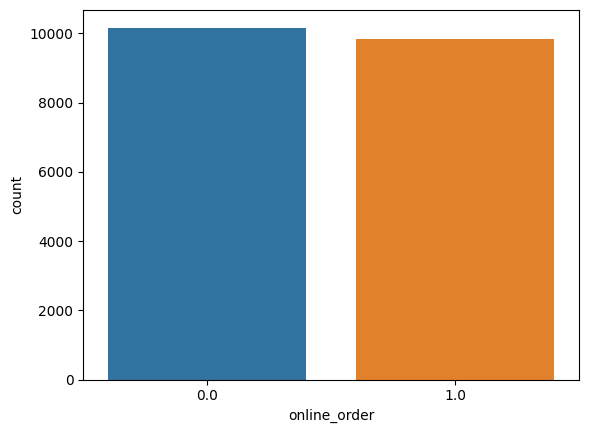

In [120]:
sns.countplot(data=td, x='online_order')